In [1]:
#Importamos las librerias necesarias para la ejecución del proyecto
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#Importamos la base de datos con la cual se va a trabajar
df = pd.read_excel('BBDD.xlsx')

In [3]:
#Ejecutamos para ver las primeras lineas de la BD
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [4]:
#Ejecutamos para ver la cantidad de lineas(datos) de la BD
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [5]:
#Filtramos la BD para solo quedarnos en este caso con el comentario en español y su respectivo sentimiento
df = df[['sentimiento', 'review_es' ] ].copy()

In [6]:
#Ejecutamos para ver las primeras lineas de la BD
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

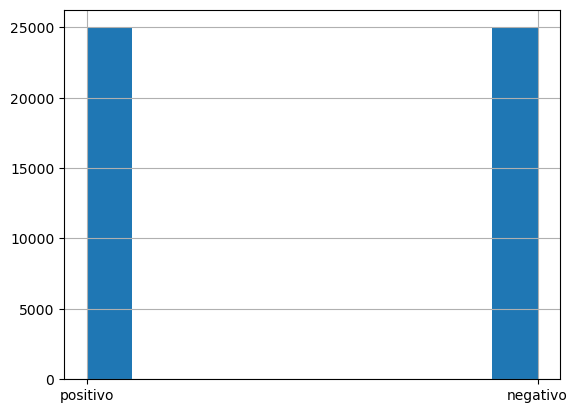

In [7]:
#Miramos el comportamiento de los sentimientos mediante un histograma
df[ 'sentimiento'].hist()

In [8]:
#Se le asignan etiquitas a los sentimientos; 1 para positivo y 0 para negativo
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)

In [9]:
#Ejecutamos para ver las primeras lineas de la BD
df.head()


,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [10]:
#Dividimos la base BD en 2 subconjuntos, el primero será un subconjunto de entrenamiento y el segundo uno de prueba
df_train, df_test = train_test_split(df)

In [11]:
#Ejecutamos para ver las primeras lineas del conjunto de entrenamiento
df_train

,sentimiento,review_es,target
40323,positivo,Amo a Ashley Judd y creo que todas sus películ...,1
891,positivo,Estas películas un poco simplemente no obtiene...,1
42820,negativo,Esta película realmente extraña la marca en la...,0
37604,positivo,La película más notoria de Depardieu es este (...,1
122,negativo,"""Un director de televisión aburrido se present...",0
...,...,...,...
915,positivo,Meticulosamente construido y jugado perfectame...,1
45287,negativo,Lunacy desagradable de la Lava Spewing of the ...,0
664,positivo,Un platillo volador tripulado (literalmente) p...,1
38487,negativo,"Sí, podría no ser históricamente preciso (en r...",0


In [12]:
#Ejecutamos para ver las primeras lineas del conjunto de prueba
df_test

,sentimiento,review_es,target
37803,positivo,Hak Hap (máscara negra) es lo que me gustaría ...,1
25089,negativo,"Cuando fui a ver esta película, ya era una opc...",0
36932,positivo,"Si tiene una caja de tejidos, un cómodo sofá, ...",1
24443,positivo,Siempre me gustó escuchar a Buddy Holly y sent...,1
12306,negativo,"La peor película que he visto nunca, ni siquie...",0
...,...,...,...
6326,negativo,Pilot Mitch MacaFee (Jeff Morrow) ve un OVNI m...,0
34414,positivo,"Coincidiendo con el inicio del auge del bebé, ...",1
40570,negativo,No entiendo cómo algunas personas pueden sopor...,0
16492,positivo,Escribo esto después de ver la última transmis...,1


In [14]:
#Vectorizamos dando el maximo de dimensiones
vectorizer = TfidfVectorizer(max_features=2000)

In [15]:
#Vectorizamos el conjunto de entrenamiento
X_train = vectorizer.fit_transform(df_train['review_es'])

In [16]:
#Ejecutamos para verificar las nuevas dimensiones
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3471441 stored elements in Compressed Sparse Row format>

In [17]:
#Vectorizamos el conjunto de prueba
X_test = vectorizer.transform(df_test['review_es'])

In [18]:
#Ejecutamos para verificar las nuevas dimensiones
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1146864 stored elements in Compressed Sparse Row format>

In [19]:
#Guardamos las "etiquetas" asignadas a los comentarios en subconjuntos
Y_train = df_train['target']
Y_test = df_test['target']

In [20]:
#Creamos el modelo el cual ejecuta la REGRESIÓN LOGISTICA para verificar la precisión del modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print ("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8789333333333333
Test acc: 0.8636


In [21]:
#Ejecutamos ambos conjuntos tanto el conjunto de entrenamiento como el de prueba
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [22]:
#Calculamos la MATRIZ DE CONFUSIÓN
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.8687014, 0.1312986],
       [0.1108085, 0.8891915]])

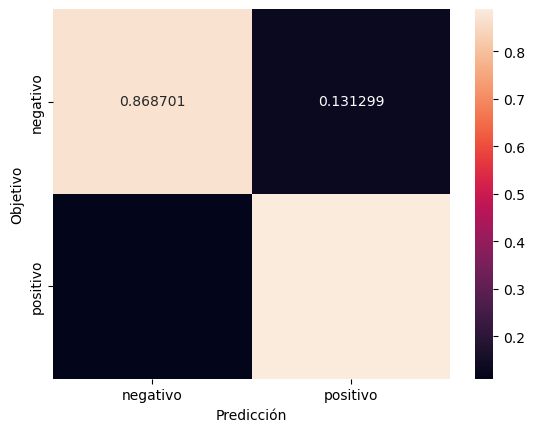

In [23]:
#Graficamos la MATRIZ DE CONFUSIÓN para el conjunto de entrenamiento
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

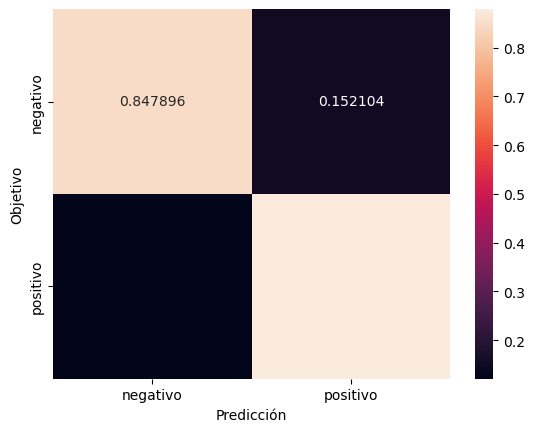

In [24]:
#Graficamos la MATRIZ DE CONFUSIÓN para el conjunto de prueba
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)

In [25]:
#Ejecutamos para ver que tanto se repirten las palabras
word_index_map = vectorizer.vocabulary_
word_index_map

{'amo': 101,
 'creo': 398,
 'que': 1511,
 'todas': 1818,
 'sus': 1741,
 'películas': 1365,
 'son': 1702,
 'geniales': 800,
 'es': 626,
 'uno': 1877,
 'de': 440,
 'mejores': 1142,
 'una': 1872,
 'película': 1364,
 'muy': 1217,
 'realmente': 1540,
 'tienes': 1810,
 'ver': 1910,
 'cerca': 285,
 'para': 1336,
 'historia': 891,
 'mujer': 1209,
 'intenta': 966,
 'sola': 1695,
 'las': 1032,
 'su': 1721,
 'vida': 1926,
 'sea': 1619,
 'fácil': 788,
 'algunas': 75,
 'como': 341,
 'chicas': 294,
 'el': 572,
 'tiempo': 1805,
 'matar': 1127,
 'probablemente': 1464,
 'lo': 1069,
 'hicieron': 883,
 'mejor': 1141,
 'en': 587,
 'la': 1026,
 'los': 1079,
 'video': 1928,
 'eran': 622,
 'buenas': 226,
 'pero': 1386,
 'se': 1618,
 'acuerdo': 46,
 'estas': 681,
 'un': 1871,
 'poco': 1419,
 'simplemente': 1680,
 'no': 1251,
 'crédito': 402,
 'esta': 669,
 'mi': 1153,
 'segunda': 1630,
 'favorita': 746,
 'todos': 1821,
 'tiempos': 1806,
 'by': 233,
 'me': 1135,
 'siendo': 1667,
 'razón': 1530,
 'por': 1434,
 

In [28]:
#Buscamos las palabras mas positivas, dando como condición el corte en 4
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
increíble 4.382959947217826
maravillosa 4.395147453006971
excelente 7.845625694618859
perfecto 4.661679679572083
genial 4.026488860875267
hoy 4.423214222530175
definitivamente 4.197391635613737
encantó 4.888214206994788
excelentes 4.114171938402513
recomiendo 4.159912761341583
disfruté 4.465956654528125


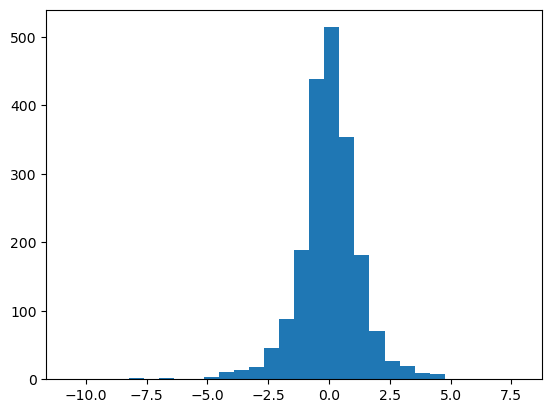

In [27]:
#Graficamos el histograma de los COEFICIENTES
plt.hist(model.coef_[0], bins=30);

In [47]:
#Buscamos cuales son las palabras mas negativas, el "corte" será en este caso -4
corte = 4

print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
no -4.545009903300971
horrible -9.192327145464827
decepción -5.05328972025098
mal -5.7280977751095445
malo -4.315774313307566
peor -10.34146053471517
minutos -4.275106914580173
peores -7.161269248654315
desperdicio -4.122821127862927
desafortunadamente -4.74564787826323
nada -4.016133532338809
aburrido -6.454740772176001
mala -7.361594337424704
aburrida -6.4705455159019785
basura -4.729416198824613
pobre -5.665994746747177
terrible -7.67514941422682
decepcionante -4.705822578531561


In [50]:
#Analizaremos comentarios propios para ver el rendimiento del codigo
prueba = ["estuvo muy entretenida la película", "estuvo terrible la película, me aburrí mucho", "no la recomiendo", "la"]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)


In [51]:
# Predecir con el modelo
P = model.predict(x)

In [52]:
# Obtener las clases del modelo
clases = model.classes_

In [53]:
# Mostrar la clase predicha
for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'estuvo muy entretenida la película' es: Positivo
el Comentario: 'estuvo terrible la película, me aburrí mucho' es: Negativo
el Comentario: 'no la recomiendo' es: Positivo
el Comentario: 'la' es: Positivo
